# Интерполационна формула на Нютон. Някои практически въпроси, свързани с интерполацията.

### Задача 1

Да се напише функция _divided_difference(nodes, values)_, където _nodes_ е списък с точки от реалната права, а _values_ -- списък с реални стойности. Функцията да изчислява разделената разлика на функция със стойности _values_ в точките _nodes_.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def divided_difference(nodes, values):
    if(nodes.size == 1):
        return values[0]
    else:
        return (divided_difference(nodes[1 : ], values[1 : ]) - divided_difference(nodes[ : -1],values[ : -1])) / (nodes[-1] - nodes[0])

### Задача 2
Да се напише функция *newton_poly(nodes, values, x)*, която връща интерполационния полином на Лагранж, с възли _nodes_ и съответни стойности _values_.

In [36]:
def newton_poly(nodes, values, x):
    poly = 0
    product = 1
    for i in range(nodes.size):
        poly += divided_difference(nodes[ : i + 1],values[ : i + 1]) * product
        product *= (x - nodes[i])
    return poly

### Задача 3
В таблицата са дадени данни за населението на САЩ в периода 1920-1990. Да се построи
полином от седма степен, интерполиращ таблицата. Да се даде приближение на населението
през 1952, 1974, 2000 година и да се сравни с действителните стойности --
съответно 157 млн., 214 млн., 281.42 млн.


| Година| 1920 | 1930 | 1940 | 1950 | 1960 | 1970 | 1980 | 1990 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Население | 106.46 | 123.08 | 132.12 | 152.27 | 180.67 | 205.05 | 227.23 | 249.46 |


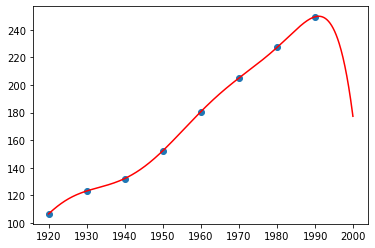

In [38]:
years = np.arange(1920, 2000, 10)
population = np.array([106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46])
def poly1(x):
    return newton_poly(years, population, x)
x = np.arange(1920, 2000, 0.1)
plt.scatter(years, population)
plt.plot(x, poly1(x), color='r')
plt.show()

In [9]:
print(poly1(1952))
print(poly1(1974))
print(poly1(2000))

157.72802626559996
213.51053127680007
175.08000000000226


### Задача 4

Дадена е функцията на Рунге $ f(x)=\dfrac{1}{1+25x^2}$. Да се приближи $ f(x) $ в интервала $x \in [-1,1],$ като се използват интерполационни полиноми от степени 10 и 4 с равноотдалечени възли. 
Да се построят графиките на всеки от полиномите, заедно с графиката на функцията в една координатна система, както и графиките на абсолютната грешка по модул в двата случая.


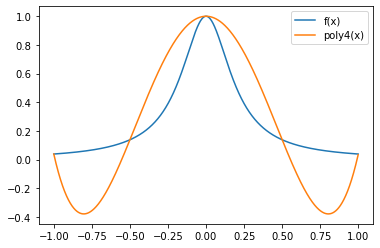

In [11]:
#linspace returns fixed number of enevly spaced points in an interval
#arange works like range in Wolfram
nodes4 = np.linspace(-1, 1, 5)
def f(x):
    return 1 / (1 + 25 * x**2)
values4 = f(nodes4)
def poly4(x):
    return newton_poly(nodes4, values4, x)
x=np.arange(-1, 1 ,0.001)
plt.plot(x ,f(x))
plt.plot(x, poly4(x))
plt.legend(['f(x)','poly4(x)'])
plt.show()

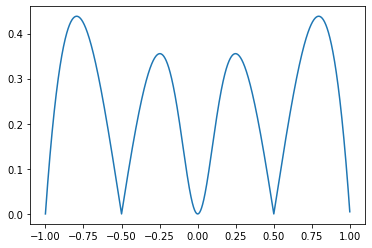

In [12]:
plt.plot(x,abs(f(x) - poly4(x)))
plt.show()

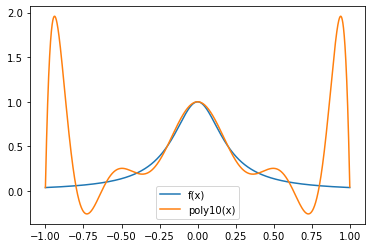

In [13]:
nodes10 = np.linspace(-1, 1, 11)
values10 = f(nodes10)
def poly10(x):
    return newton_poly(nodes10, values10, x)
x=np.arange(-1, 1, 0.0001)
plt.plot(x, f(x))
plt.plot(x, poly10(x))
plt.legend(['f(x)','poly10(x)'])
plt.show()

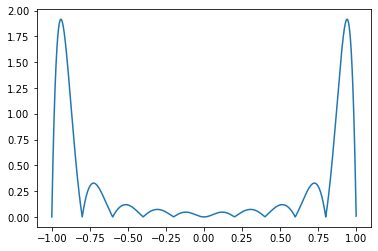

In [14]:
plt.plot(x,abs(f(x) - poly10(x)))
plt.show()

### Задача 5
-----------------------------------------------------------------

Известно е (вж. лекции), че най-добрите възли за интерполация в интервала $[-1,1]$ са т.нар. Чебишови възли, които се задават по формулата:

$\xi_k = \cos \left( \dfrac{2k-1}{2n} \pi \right), k=1,\dots,n$


Да се построи интерполационен полином от 10-та степен за функцията на Рунге, като за целта се използват съответните Чебишови възли в интервала $[-1,1]$. Да се построи графика на абсолютната грешка.

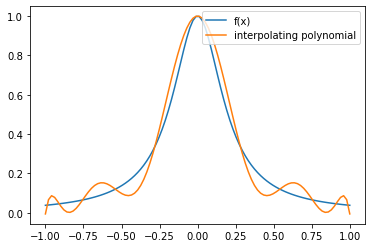

In [16]:
def f(x):
    return 1 / (1 + 25 * x**2)
n = 11
chebyshev_nodes = np.empty(n)
for k in range(n):
    chebyshev_nodes[k] = np.cos((2 * (k + 1) - 1) / (2 * n) * np.pi)

chebyshev_values = f(chebyshev_nodes)

#def chebyshev_interp(x):
#    newton_poly(chebyshev_nodes,chebyshev_values,x)
   
x = np.linspace(-1, 1, 100)
plt.plot(x, f(x))
plt.plot(x, newton_poly(chebyshev_nodes, chebyshev_values, x))
plt.legend(['f(x)','interpolating polynomial'])
plt.show()

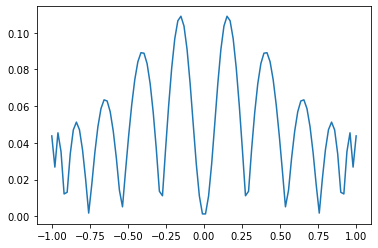

In [17]:
plt.plot(x, abs(f(x) - newton_poly(chebyshev_nodes, chebyshev_values, x)))
plt.show()

### Задача 6

Проведени са експерименти за определяне бързодействието на един алгоритъм за сортиране в зависимост от броя входни елементи. Резултатите са представени в следната таблица:


| Брой елементи (x1000) | 10 | 20 | 50 | 100 | 150 | 200 | 250 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Време | 0.163928 | 0.53282 | 3.00007 | 11.2078 | 26.7487 | 47.3297 | 76.8061 |

Да се определи приблизително колко елемента могат да се сортират за 30 сек.

In [11]:
elements = np.array([10, 20, 50, 100, 150, 200, 250])
time = np.array([0.163928, 0.53282, 3.00007, 11.2078, 26.7487, 47.3297, 76.8061])

def wrong(x):
    return newton_poly(time, elements, x)

print(wrong(30))

0.3275728261445181


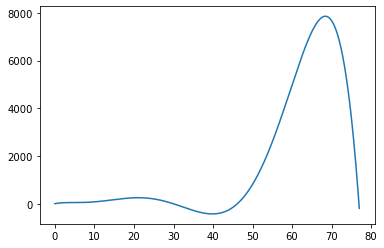

In [13]:
x_axis = np.linspace(0, 77, 1000)
plt.plot(x_axis, wrong(x_axis))
plt.show()

In [14]:
wrong(47.3297)

2.7176652078006667

In [16]:
# SymPy is a Python library for symbolic computations
from sympy import Symbol, expand, Eq, solve

x = Symbol('x')
left_part = expand(newton_poly(elements, time, x))




equation = Eq(left_part, 30)
sol = solve(equation, x)
print(sol)

[-59.2372258204670, 158.463886561511, 19.0353604249825 - 118.902227037914*I, 19.0353604249825 + 118.902227037914*I, 258.811310015336 - 91.415888526688*I, 258.811310015336 + 91.415888526688*I]


In [25]:
expand(newton_poly(elements, time, x))

2.90514711714253e-12*x**6 - 1.90263895467021e-9*x**5 + 4.51166858336103e-7*x**4 - 4.65622120757951e-5*x**3 + 0.00317674920264755*x**2 - 0.0320157148523016*x + 0.208648130499045

In [15]:
from sympy import Symbol, expand, Eq, solve

x = Symbol('x')
left_part = newton_poly(elements, time, x)
print(expand(left_part))

2.90514711714253e-12*x**6 - 1.90263895467021e-9*x**5 + 4.51166858336103e-7*x**4 - 4.65622120757951e-5*x**3 + 0.00317674920264755*x**2 - 0.0320157148523016*x + 0.208648130499045


In [25]:
equation = Eq(expand(left_part), 30)

In [27]:
solve(equation, x)

[-59.2372258204670,
 158.463886561511,
 19.0353604249825 - 118.902227037914*I,
 19.0353604249825 + 118.902227037914*I,
 258.811310015336 - 91.415888526688*I,
 258.811310015336 + 91.415888526688*I]